# Detect Credit Card Fraud

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download

**Content**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.

It contains only numerical input variables which are the result of a PCA transformation.

The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [88]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option('float_format', '{:f}'.format)

import matplotlib.pyplot as plt
import matplotlib.colors as colors  
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

from sklearn import metrics 
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
#from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score

import collections
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [5]:
df.info()
#only non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


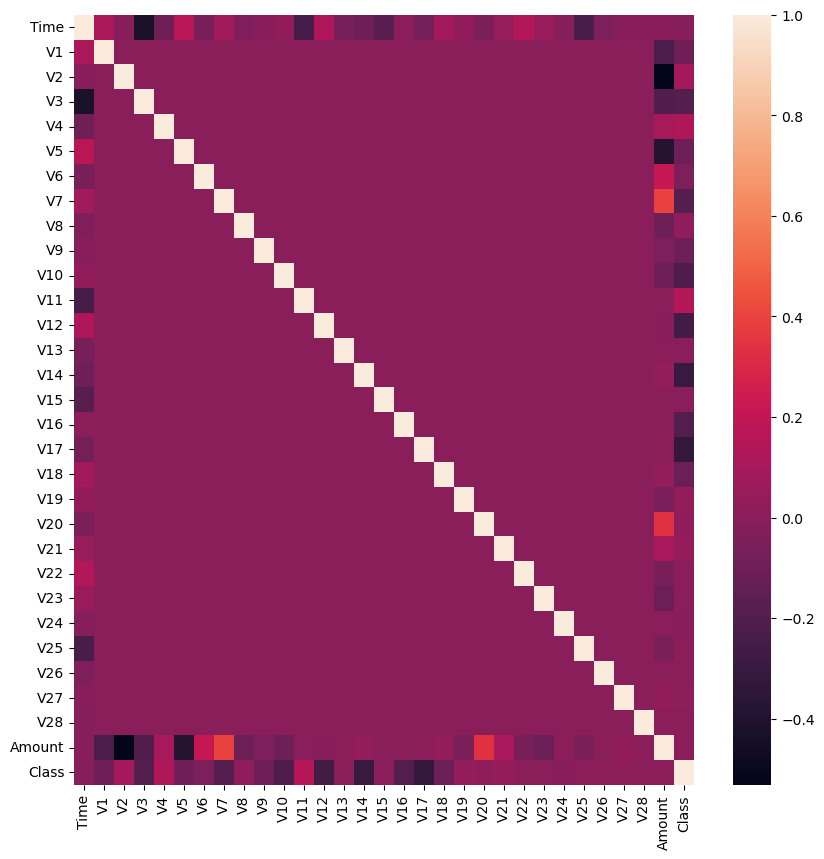

In [6]:
#correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

In [7]:
df.Class.value_counts()
#higly imbalanced

0    284315
1       492
Name: Class, dtype: int64

In [8]:
classes=df['Class'].value_counts()
normal_transaction=round(classes[0]/df['Class'].count()*100,2)
fraud_transaction=round(classes[1]/df['Class'].count()*100, 2)

#imbalanced class
(fraud_transaction/normal_transaction)*100

0.17028949213663228

In [11]:
y=df['Class']
X=df[df.columns[1:-1]]

### Train Test Split

This step is done before anything else to avoid biased results.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

### Standardize data

In [82]:
#variable from V1 to V28 are already transformed with PCA, so the only variable that needs scaling is Amount
scaler = RobustScaler() 

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [92]:

pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)  # creates an instance of the PowerTransformer class.
pt.fit(X_train)

X_train = pt.transform(X_train)
X_test = pt.transform(X_test)

### Resampling for imbalanced classes

In [93]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 199021, 1: 343})
Resample dataset shape Counter({0: 199021, 1: 199021})


## Models

- Logistic Regression
- Random Forest decision tree
- Gradient Boosted Decision Trees
- KNeighborsClassifier

As stated in the *sklearn documentation* [https://scikit-learn.org/stable/modules/cross_validation.html], some classification problems can exhibit a **large imbalance** in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use **stratified sampling** as implemented in **StratifiedKFold** and **StratifiedShuffleSplit** to ensure that relative class frequencies is approximately preserved in each train and validation fold.

### Metrics used
The **F1-score** is a commonly used metric for evaluating the performance of binary classifiers. It combines precision and recall into a single score and provides a measure of the overall accuracy of the mode.

A high **recall** indicates that the model is very good at identifying positive cases, and there are few missed positive cases in its output. On the other hand, a low recall means that the model has a higher rate of missed positive cases, which can also lead to incorrect or misleading results.

In [62]:
#StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Logistic Regression

- RECALL = 0.93
- F1-SCORE = 0.57

Best Params Logistic Regression
{'C': 0.5}

Best Score Logistic Regression
0.9882205865651432
---------------------------------------------------------------
ROC AUC curve Logistic Regression:


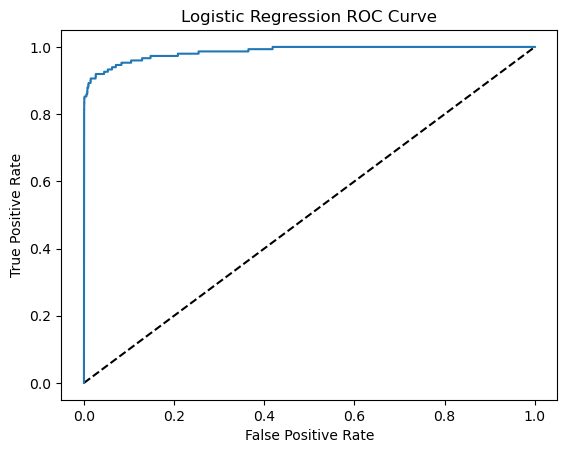

ROC AUC score Logistic Regression:
0.9860020681722579
---------------------------------------------------------------
Precision Recall curve Logistic Regression:


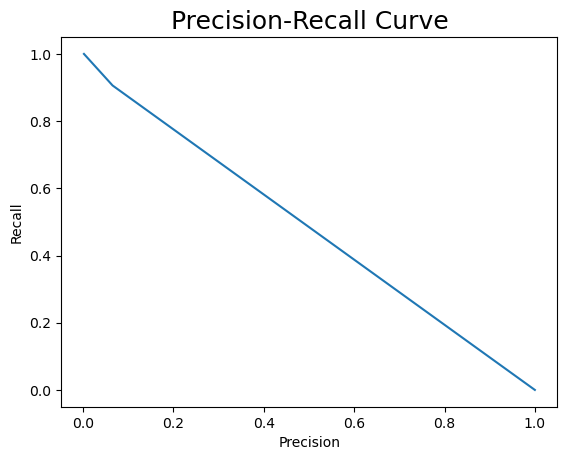

Precision Recall score Logistic Regression:
0.059196398373328754
---------------------------------------------------------------

Confusion matrix Logistic Regression:
[[83357  1937]
 [   14   135]]

Classification report Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85294
           1       0.07      0.91      0.12       149

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443

---------------------------------------------------------------


In [84]:
logreg = LogisticRegression(penalty='l2')

grid = {"C": [0.01, 0.1, 0.5]}

cv = GridSearchCV(estimator=logreg, param_grid=grid, cv=skf, scoring='roc_auc')
cv.fit(x_smote, y_smote)

print("Best Params Logistic Regression")
print(cv.best_params_)
print("\nBest Score Logistic Regression")
print(cv.best_score_)
print("---------------------------------------------------------------")

#probability for ROCAUC score
y_pred_p = cv.best_estimator_.predict_proba(X_test)

#class labels for metrics
y_pred = cv.best_estimator_.predict(X_test)


#ROC Curve
print("ROC AUC curve Logistic Regression:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_p[:, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

print("ROC AUC score Logistic Regression:")
print(roc_auc_score(y_test, y_pred_p[:, 1]))
print("---------------------------------------------------------------")



#precision-recall curve
print("Precision Recall curve Logistic Regression:")
#fig, ax = plt.subplots()
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve', fontsize = 18)
plt.show()

print("Precision Recall score Logistic Regression:")
print(average_precision_score(y_test, y_pred))
print("---------------------------------------------------------------")



#confusion matrix and classification reportà
#y_pred_int=(y_pred >= 0.5).astype(int)
print("\nConfusion matrix Logistic Regression:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report Logistic Regression:")
print(classification_report(y_test, y_pred))
print("---------------------------------------------------------------")

### Random Forest Classifier

- RECALL = 0.93
- F1-SCORE = 0.55

Best Params Random Forest
{'max_depth': 5, 'n_estimators': 10}

Best Score Random Forest
0.9889354916247874
---------------------------------------------------------------
ROC AUC curve Random Forest:


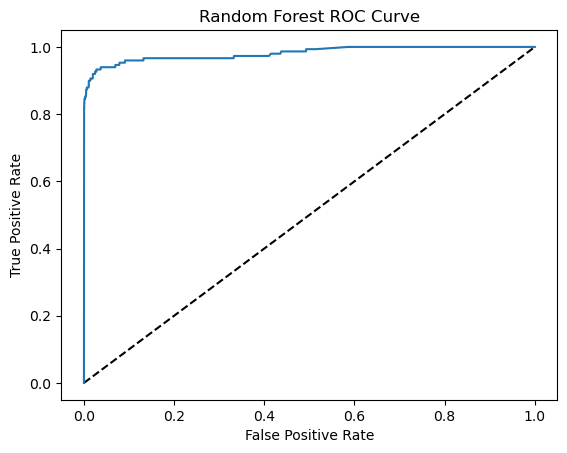

ROC AUC score Random Forest:
0.9811726609092939
---------------------------------------------------------------
Precision Recall curve Random Forest:


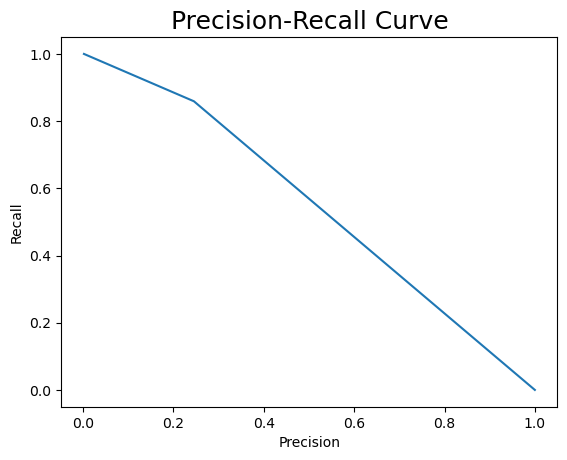

Precision Recall score Random Forest:
0.21089660459893605
---------------------------------------------------------------

Confusion matrix Random Forest:
[[84900   394]
 [   21   128]]

Classification report Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.25      0.86      0.38       149

    accuracy                           1.00     85443
   macro avg       0.62      0.93      0.69     85443
weighted avg       1.00      1.00      1.00     85443

---------------------------------------------------------------


In [94]:
rf = RandomForestClassifier(random_state=27)

grid = {'max_depth': [2, 5], 
        'n_estimators': [5, 10]}

cv = GridSearchCV(estimator=rf, param_grid=grid, cv=skf, scoring='roc_auc')
cv.fit(x_smote, y_smote)


print("Best Params Random Forest")
print(cv.best_params_)
print("\nBest Score Random Forest")
print(cv.best_score_)
print("---------------------------------------------------------------")

#probability for ROCAUC score
y_pred_p = cv.best_estimator_.predict_proba(X_test)

#class labels for metrics
y_pred = cv.best_estimator_.predict(X_test)


#ROC Curve
print("ROC AUC curve Random Forest:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_p[:, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

print("ROC AUC score Random Forest:")
print(roc_auc_score(y_test, y_pred_p[:, 1]))
print("---------------------------------------------------------------")



#precision-recall curve
print("Precision Recall curve Random Forest:")
#fig, ax = plt.subplots()
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve', fontsize = 18)
plt.show()

print("Precision Recall score Random Forest:")
print(average_precision_score(y_test, y_pred))
print("---------------------------------------------------------------")



#confusion matrix and classification report
#y_pred_int=(y_pred >= 0.5).astype(int)
print("\nConfusion matrix Random Forest:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report Random Forest:")
print(classification_report(y_test, y_pred))
print("---------------------------------------------------------------")

### Gradient Boosted Decision Trees

- RECALL = 0.92
- F1-SCORE = 0.71

ROC AUC curve Gradient Boosting:


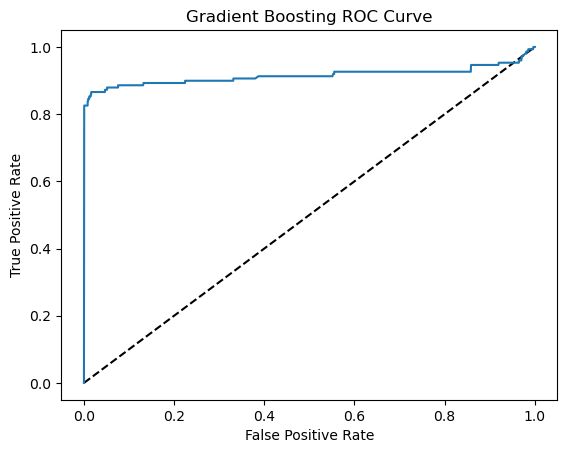

ROC AUC score Gradient Boosting:
0.9142342325471016
---------------------------------------------------------------
Precision Recall curve Gradient Boosting:


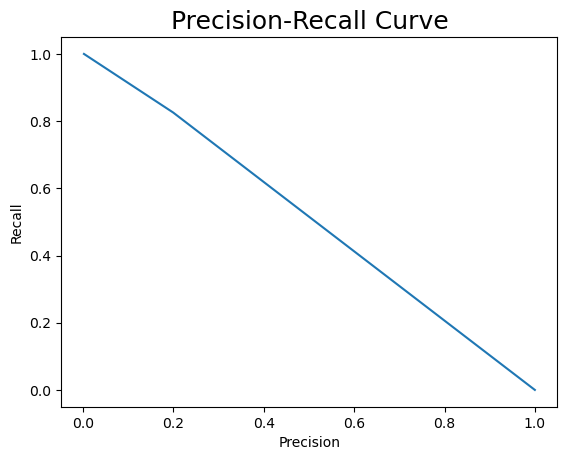

Precision Recall score Gradient Boosting:
0.16486979521869938
---------------------------------------------------------------

Confusion matrix Gradient Boosting:
[[84800   494]
 [   26   123]]

Classification report Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85294
           1       0.20      0.83      0.32       149

    accuracy                           0.99     85443
   macro avg       0.60      0.91      0.66     85443
weighted avg       1.00      0.99      1.00     85443

---------------------------------------------------------------


In [97]:
gbrModel = GradientBoostingClassifier()

grid = {'max_depth': [5, 10],
        'n_estimators': [10]}

cv = GridSearchCV(estimator=gbrModel, param_grid=grid, cv=skf, scoring='roc_auc')
cv.fit(x_smote, y_smote)

print("Best Params Gradient Boosting")
print(cv.best_params_)
print("\nBest Score Gradient Boosting")
print(cv.best_score_)
print("---------------------------------------------------------------")

#probability for ROCAUC score
y_pred_p = cv.best_estimator_.predict_proba(X_test)

#class labels for metrics
y_pred = cv.best_estimator_.predict(X_test)


#ROC Curve
print("ROC AUC curve Gradient Boosting:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_p[:, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.show()

print("ROC AUC score Gradient Boosting:")
print(roc_auc_score(y_test, y_pred_p[:, 1]))
print("---------------------------------------------------------------")



#precision-recall curve
print("Precision Recall curve Gradient Boosting:")
#fig, ax = plt.subplots()
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve', fontsize = 18)
plt.show()

print("Precision Recall score Gradient Boosting:")
print(average_precision_score(y_test, y_pred))
print("---------------------------------------------------------------")



#confusion matrix and classification report
print("\nConfusion matrix Gradient Boosting:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report Gradient Boosting:")
print(classification_report(y_test, y_pred))
print("---------------------------------------------------------------")

### XGBoost

- RECALL = 0.91
- F1-SCORE = 0.87

Best Params Gradient Boosting
{'max_depth': 10, 'n_estimators': 10}

Best Score Gradient Boosting
0.9999743657022062
---------------------------------------------------------------
ROC AUC curve Gradient Boosting:


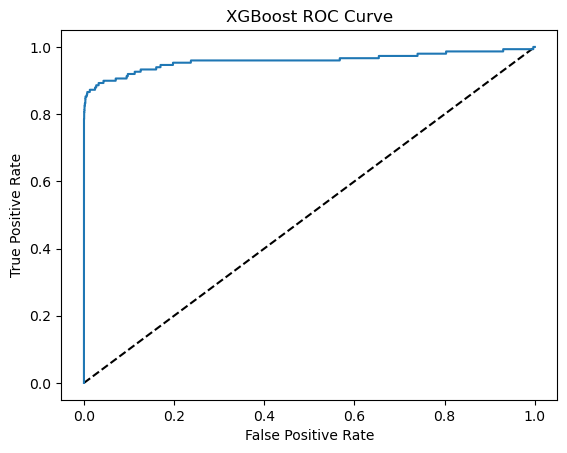

ROC AUC score XGBoost:
0.9588634054214062
---------------------------------------------------------------
Precision Recall curve XGBoost:


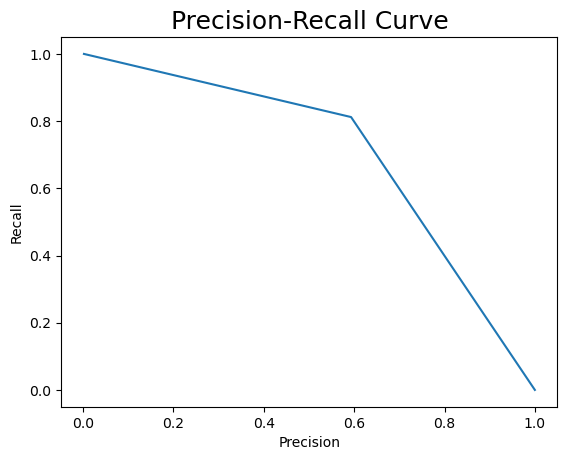

Precision Recall score XGBoost:
0.4820029242730899
---------------------------------------------------------------

Confusion matrix XGBoost:
[[85211    83]
 [   28   121]]

Classification report XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.59      0.81      0.69       149

    accuracy                           1.00     85443
   macro avg       0.80      0.91      0.84     85443
weighted avg       1.00      1.00      1.00     85443

---------------------------------------------------------------


In [98]:
xgbModel = XGBClassifier(learning_rate=0.8)

grid = {'max_depth': [10],
        'n_estimators': [10]}

cv = GridSearchCV(estimator=xgbModel, param_grid=grid, cv=skf, scoring='roc_auc')
cv.fit(x_smote, y_smote)

print("Best Params Gradient Boosting")
print(cv.best_params_)
print("\nBest Score Gradient Boosting")
print(cv.best_score_)
print("---------------------------------------------------------------")

#probability for ROCAUC score
y_pred_p = cv.best_estimator_.predict_proba(X_test)

#class labels for metrics
y_pred = cv.best_estimator_.predict(X_test)


#ROC Curve
print("ROC AUC curve Gradient Boosting:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_p[:, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.show()

print("ROC AUC score XGBoost:")
print(roc_auc_score(y_test, y_pred_p[:, 1]))
print("---------------------------------------------------------------")



#precision-recall curve
print("Precision Recall curve XGBoost:")
#fig, ax = plt.subplots()
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve', fontsize = 18)
plt.show()

print("Precision Recall score XGBoost:")
print(average_precision_score(y_test, y_pred))
print("---------------------------------------------------------------")



#confusion matrix and classification report
print("\nConfusion matrix XGBoost:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report XGBoost:")
print(classification_report(y_test, y_pred))
print("---------------------------------------------------------------")

### KNeighborsClassifier

- RECALL = 0.92
- F1-SCORE = 0.71

Computationally expensive

Best Params KNN
{'n_neighbors': 5}

Best Score KNN
0.9977816412847427
---------------------------------------------------------------
ROC AUC curve KNN:


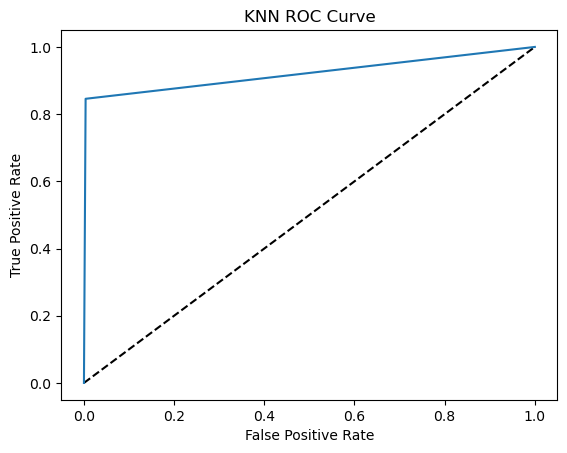

ROC AUC score KNN:
0.9209722376751993
---------------------------------------------------------------
Precision Recall curve KNN:


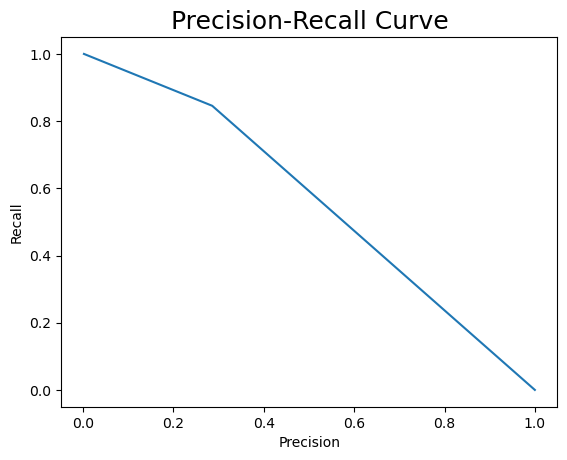

Precision Recall score KNN:
0.24187992355985663
---------------------------------------------------------------

Confusion matrix KNN:
[[84979   315]
 [   23   126]]

Classification report KNN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       0.29      0.85      0.43       149

    accuracy                           1.00     85443
   macro avg       0.64      0.92      0.71     85443
weighted avg       1.00      1.00      1.00     85443

---------------------------------------------------------------


In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42, scoring='roc_auc')
grid = {'n_neighbors': [3, 5]}

cv = GridSearchCV(estimator=knn, param_grid=grid, cv=skf)
cv.fit(x_smote, y_smote)

print("Best Params KNN")
print(cv.best_params_)
print("\nBest Score KNN")
print(cv.best_score_)
print("---------------------------------------------------------------")

y_pred = cv.best_estimator_.predict(X_test)


#ROC Curve
print("ROC AUC curve KNN:")
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()

print("ROC AUC score KNN:")
print(roc_auc_score(y_test, y_pred))
print("---------------------------------------------------------------")



#precision-recall curve
print("Precision Recall curve KNN:")
#fig, ax = plt.subplots()
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred)
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve', fontsize = 18)
plt.show()

print("Precision Recall score KNN:")
print(average_precision_score(y_test, y_pred))
print("---------------------------------------------------------------")



#confusion matrix and classification report
y_pred_int=(y_pred >= 0.5).astype(int)
print("\nConfusion matrix KNN:")
print(confusion_matrix(y_test, y_pred_int))
print("\nClassification report KNN:")
print(classification_report(y_test, y_pred_int))
print("---------------------------------------------------------------")